In [14]:
import pandas as pd

In [12]:
with open("inventors_KR.txt", encoding = "utf8") as f:
    contents = f.readlines()

dataf = []

for x in range(len(contents)):
    contents[x] = contents[x].replace("\n","")
    contents[x] = contents[x].split(":")
    hold = contents[x][1].split(",")
    for name in hold:
        dataf += [[contents[x][0], name]]


In [15]:
df = pd.DataFrame(dataf)
df

,0,1
0,US6451348,정서영
1,US6451348,최귀원
2,US6451348,권익찬
3,US6451348,김용희
4,US6451348,최재봉
...,...,...
23536,US6822382,박병진
23537,US7113464,노재우
23538,US7113464,조장현
23539,US6656783,박주욱


In [16]:
df1 = df.copy()

df1[1] = df[1].str[1:]

df1

,0,1
0,US6451348,서영
1,US6451348,귀원
2,US6451348,익찬
3,US6451348,용희
4,US6451348,재봉
...,...,...
23536,US6822382,병진
23537,US7113464,재우
23538,US7113464,장현
23539,US6656783,주욱


In [17]:
gender1 = pd.read_csv("zhko.csv")
gender2 = pd.read_csv("zhko_with_weight.csv")

gender2

,name,code,gender,wgt
0,䁑,CN,F,1.000000
1,䢖红,CN,F,1.000000
2,䶮,CN,M,1.000000
3,一,CN,F,0.291112
4,一,CN,M,0.708888
...,...,...,...,...
1094262,힘찬,KR,M,1.000000
1094263,凉,CN,F,0.500000
1094264,凉,CN,M,0.500000
1094265,凉峰,CN,M,1.000000


In [18]:
KOgender1 = gender1[gender1['langcode'] == "ko"]
KOgender2 = gender2[gender2['code'] == "KR"]

KOgender1

,name,langcode,gender
651903,가겸,ko,F
651904,가나,ko,F
651905,가란,ko,F
651906,가람휘,ko,F
651907,가랑,ko,F
...,...,...,...
657598,히나노,ko,F
657599,히요리,ko,F
657600,히카리,ko,F
657601,히토미,ko,F


In [19]:
hold1 = []

for x in df1[1]:
    if x in set(KOgender1["name"]):
        row = KOgender1.loc[KOgender1['name']== x]
        hold1 += [row['gender'].values[0]]
    elif x in set(KOgender2["name"]):
        holdf = KOgender2[KOgender2['name']==x]
        weights = holdf["wgt"].values
        if weights[0] > weights[1]:
            hold1 += ["F"]
        else:
            hold1 += ["M"]
    else:
        hold1 +=["Unknown"]

hold1


['F',
 'Unknown',
 'Unknown',
 'M',
 'Unknown',
 'M',
 'M',
 'M',
 'Unknown',
 'M',
 'Unknown',
 'Unknown',
 'M',
 'Unknown',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'Unknown',
 'M',
 'Unknown',
 'M',
 'M',
 'F',
 'M',
 'Unknown',
 'M',
 'Unknown',
 'M',
 'M',
 'Unknown',
 'Unknown',
 'Unknown',
 'M',
 'Unknown',
 'M',
 'Unknown',
 'M',
 'Unknown',
 'M',
 'M',
 'Unknown',
 'Unknown',
 'M',
 'M',
 'M',
 'M',
 'Unknown',
 'M',
 'M',
 'M',
 'M',
 'M',
 'Unknown',
 'M',
 'M',
 'Unknown',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'Unknown',
 'M',
 'Unknown',
 'Unknown',
 'Unknown',
 'M',
 'F',
 'M',
 'Unknown',
 'F',
 'M',
 'M',
 'M',
 'Unknown',
 'M',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'M',
 'M',
 'F',
 'F',
 'M',
 'Unknown',
 'M',
 'Unknown',
 'M',
 'Unknown',
 'M',
 'Unknown',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'F',
 'M',
 'M',
 'M',
 'Unknown',
 'F',
 'M',
 'M',
 'Unknown',
 'Unknown',
 'M',
 'M',
 'M',
 'F',
 'M',
 'M',
 'Unknown',
 'Un

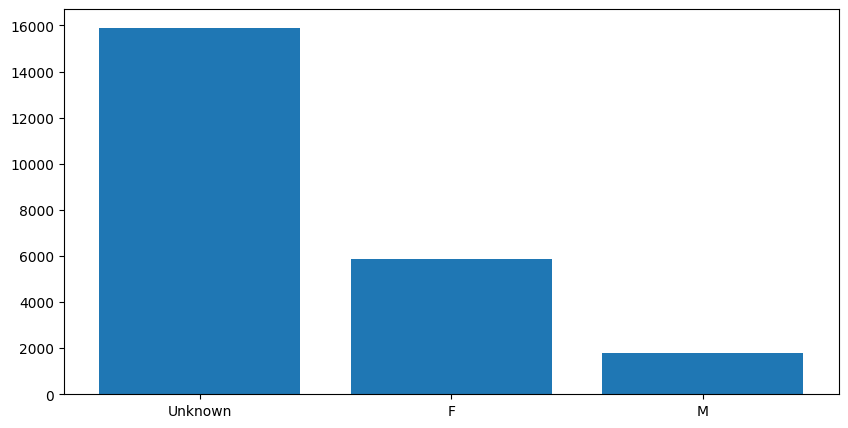

In [20]:
import matplotlib.pyplot as plt

dfdf = pd.Series(hold1)



fig = plt.figure(figsize = (10,5))

plt.bar(["Unknown",'F','M'], dfdf.value_counts().values)

plt.show()

